<a href="https://colab.research.google.com/github/Lovesher-Singh-21/Python_for_ml_and_ai/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

there are many difinitions for a regression problem but in our case, we're going to simplify it: perdicting a numerical veriable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Create data to view and fit

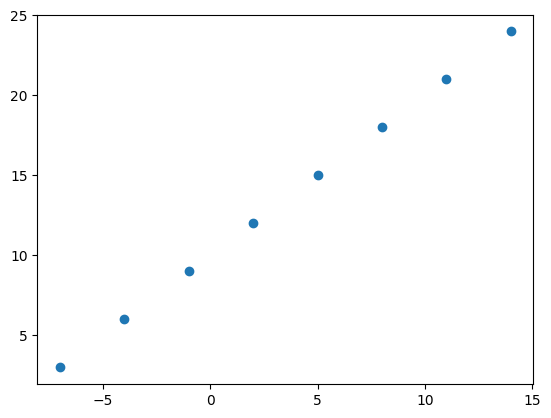

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [ ]:
input_shape = X[1].shape
output_shape = y[1].shape

input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

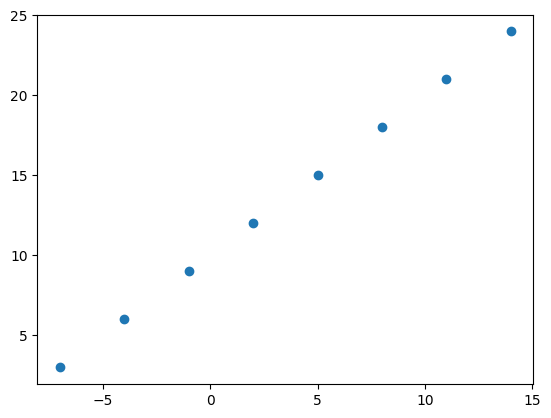

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - defina the loss function (in others words, the function which tells our model how wrong it is) ad the optimize (tells our model how to improve its patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
X = tf.reshape(X, (-1, 1))
X

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [ ]:
# Set random seet
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(), # SGD is short for Stochasic gradient descent
              metrics=["mae"])

# 3. Fit the model
# Reshape X to have an extra dimension, representing a single feature
# -1 in the reshape function means infer the size of that dimension
model1.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - loss: 18.5157 - mae: 18.5157
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 18.2344 - mae: 18.2344
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.9532 - mae: 17.9532
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 17.6719 - mae: 17.6719
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 17.3907 - mae: 17.3907


In [ ]:
# Check oyt X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
prediction_input = tf.constant([17.0], shape=(1, 1), dtype=tf.float32)

model1.predict(prediction_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[-14.169793]], dtype=float32)

 ## Improving our model

We can improve our model, by altering the  steps we took to create a model.

1. **Creating a model**: Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimizationfuntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might t a model for more **epochs** (leave it training for longer) or on mode data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# 3. Fit the modle (this time we'll train for longer)
model2.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 9.2824 - mae: 9.2824
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.1499 - mae: 9.1499
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.0174 - mae: 9.0174
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.8849 - mae: 8.8849
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.7524 - mae: 8.7524
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.6199 - mae: 8.6199
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.4874 - mae: 8.4874
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.3549 - mae: 8.3549
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.2224 - mae: 8.2224
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.0899 - mae: 8.0899
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 7.9574 - mae: 7.9574
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.8249 - mae: 7.8249
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/st

In [ ]:
# Let's see if our model's predition has improved
prediction_input = tf.constant([17.0], shape=(1,1), dtype=tf.float32)
model2.predict(prediction_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[30.198017]], dtype=float32)

In [ ]:
# Let's change the optimizer to Adam

# Create a model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ["mae"]
)

# 3. Fit the model
model3.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - loss: 14.3306 - mae: 14.3306
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 14.3301 - mae: 14.3301
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.3297 - mae: 14.3297
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 14.3292 - mae: 14.3292
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 14.3288 - mae: 14.3288
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 14.3283 - mae: 14.3283
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.3279 - mae: 14.3279
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.3274 - mae: 14.3274
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 14.3270 - mae: 14.3270
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.3265 - mae: 14.3265
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 14.3261 - mae: 14.3261
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.3256 - mae: 14.3256
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
model3.predict(prediction_input)

# Adam made it too far

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[-3.8541565]], dtype=float32)

In [ ]:
# Let's change in  creating the model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model4.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["mae"]
               )

# 3. Fit the model
model4.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9396 - mae: 12.9396
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 12.8644 - mae: 12.8644
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 12.7891 - mae: 12.7891
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 12.7138 - mae: 12.7138
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 12.6384 - mae: 12.6384
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 12.5629 - mae: 12.5629
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.4873 - mae: 12.4873
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.4116 - mae: 12.4116
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.3547 - mae: 12.3547
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 12.3018 - mae: 12.3018
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2486 - mae: 12.2486
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.1951 - mae: 12.1951
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
model4.predict(prediction_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[23.815708]], dtype=float32)

In [ ]:
# Adjusting the learning rate

# !. Create a model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

# Fitting the model
model5.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step - loss: 13.3348 - mae: 13.3348
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.3654 - mae: 12.3654
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.3859 - mae: 11.3859
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.3896 - mae: 10.3896
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.3679 - mae: 9.3679
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.3127 - mae: 8.3127
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.2172 - mae: 7.2172
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.7885 - mae: 6.7885
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.2356 - mae: 7.2356
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.6080 - mae: 7.6080
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.6921 - mae: 7.6921
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.4716 - mae: 7.4716
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
#  Let's remind of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model5.predict(prediction_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[26.037222]], dtype=float32)

## Evaluating a model

In practise, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does ou model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictionsof a model line up against the ground truth (the original labers)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labers for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

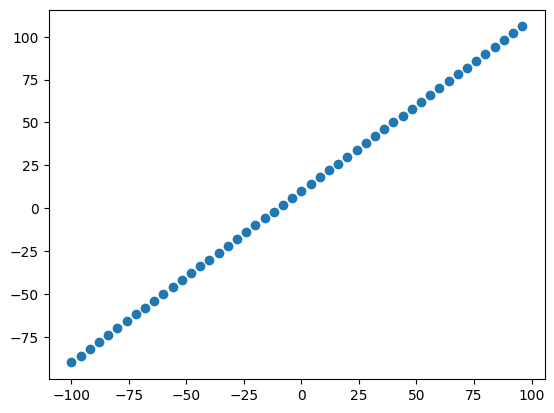

In [ ]:
# Visualize the data

plt.scatter(X, y)

### the 3 sets...

* **Training set** - the model learns from this data, which typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is tyypically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are trainig samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

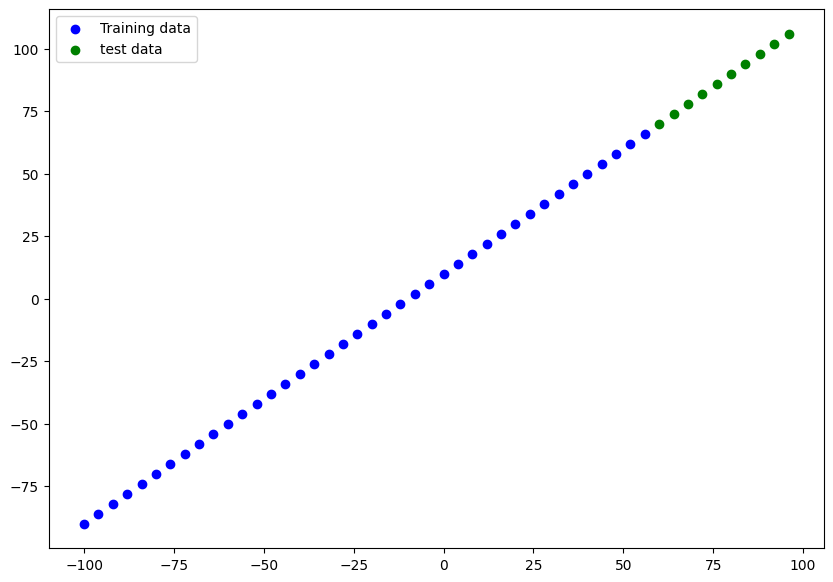

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="test data") # want our model to able to predict this (given X, what's y?)
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's create a model which builds automatically by definnig the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model

model1.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=["mae"])


In [ ]:
model1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are th parameters (patterns) the model can update as it trains.
* Non trainable parameters - these paramters aren't updated during training (this is typical when you bring in already learn patterns or paramters from other models durgin **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a laayer, check out MIT's introduction to deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary()

In [ ]:
# Let's fit our model to the training data
model1.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
y_pred = model1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[ 70.45367 ],
       [ 74.52195 ],
       [ 78.58919 ],
       [ 82.656456],
       [ 86.72409 ],
       [ 90.792046],
       [ 94.859436],
       [ 98.92301 ],
       [102.98542 ],
       [107.04563 ]], dtype=float32)

In [ ]:
# Get a summary of our model
model1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

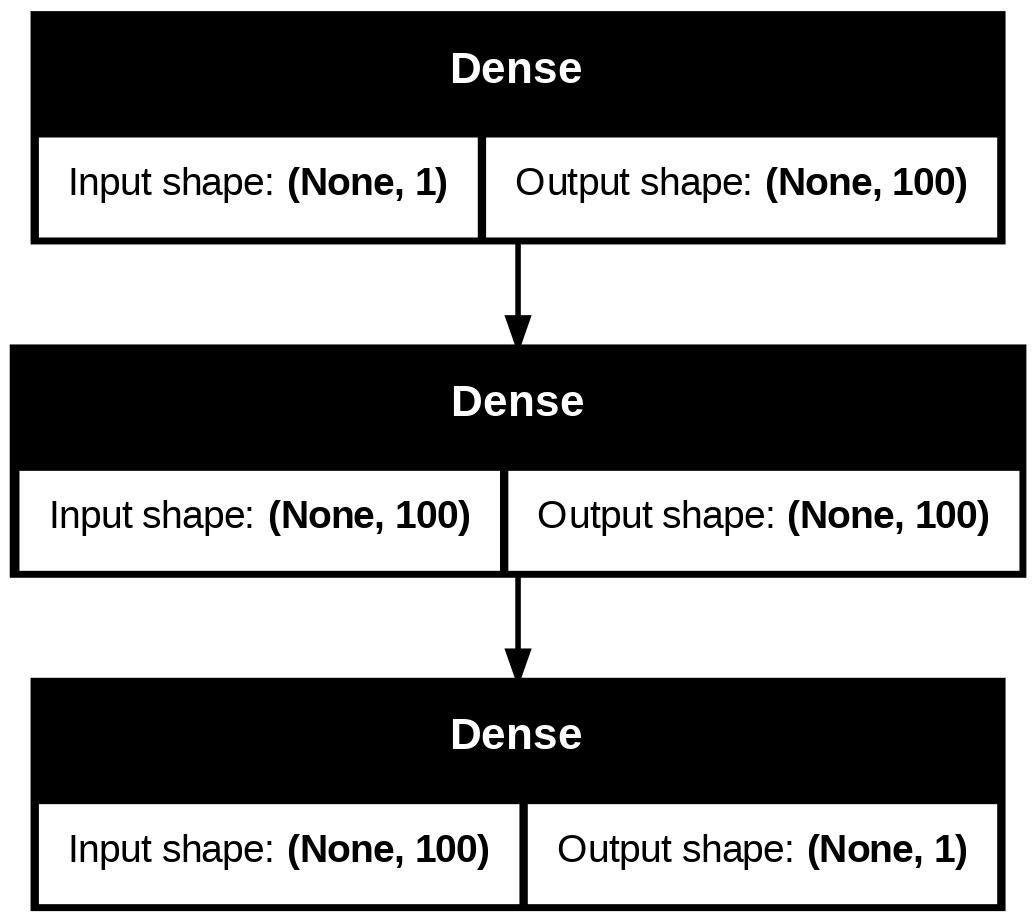

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model1, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground trudch versus your model's predictions)

In [ ]:
# Make some predictions


In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

  """
  Plots training data, test data and compares predictions to ground truck labels.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data as blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  #Plot model's preditions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  #Show the legend
  plt.legend()

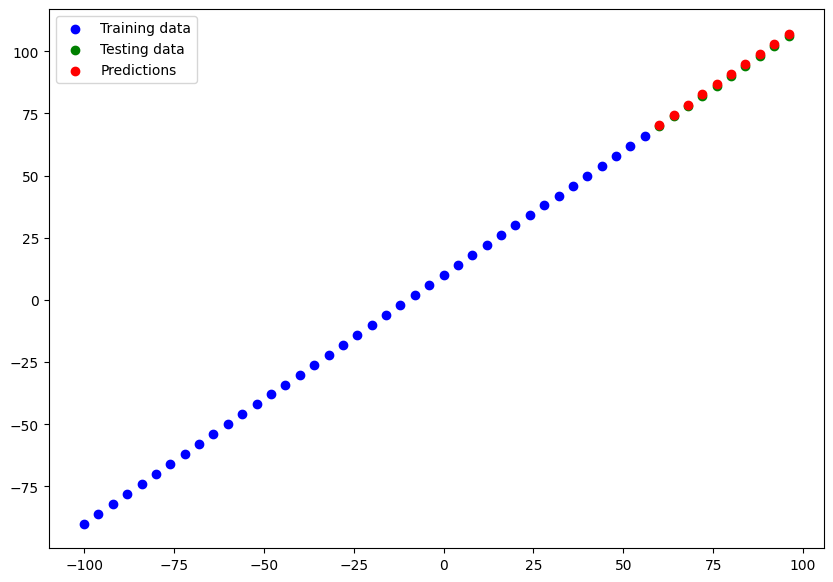

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels=y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Dependning on the problem you're working on, there will be different evaluation metris to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model1.evaluate(tf.reshape(X_test,(-1,1)), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.7551 - mae: 0.7551


[0.7550895810127258, 0.7550895810127258]

In [ ]:
# Calculate the mean absolutioe error
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.4536667 , 0.52194977, 0.5891876 , 0.656456  , 0.7240906 ,
       0.7920456 , 0.85943604, 0.9230118 , 0.9854202 , 1.0456314 ],
      dtype=float32)>

In [ ]:
y_pred

array([[ 70.45367 ],
       [ 74.52195 ],
       [ 78.58919 ],
       [ 82.656456],
       [ 86.72409 ],
       [ 90.792046],
       [ 94.859436],
       [ 98.92301 ],
       [102.98542 ],
       [107.04563 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae = tf.keras.losses.MAE(y_test, y_pred)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.4536667 , 0.52194977, 0.5891876 , 0.656456  , 0.7240906 ,
       0.7920456 , 0.85943604, 0.9230118 , 0.9854202 , 1.0456314 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.45367 ],
       [ 74.52195 ],
       [ 78.58919 ],
       [ 82.656456],
       [ 86.72409 ],
       [ 90.792046],
       [ 94.859436],
       [ 98.92301 ],
       [102.98542 ],
       [107.04563 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.45367 ,  74.52195 ,  78.58919 ,  82.656456,  86.72409 ,
        90.792046,  94.859436,  98.92301 , 102.98542 , 107.04563 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae1 = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae1

<tf.Tensor: shape=(), dtype=float32, numpy=0.7550895810127258>

In [ ]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))


mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.6062943935394287>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true=y_true,
                             y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true = y_true,
                             y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> evaluate it -> tweak it -> evaluate it ...

```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.


Let's do 3 modelling expermients:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build model_1**

In [ ]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae']
                )

#. Fit the model
model_1.fit(tf.reshape(X_train, (-1, 1)), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 90.2343 - mae: 90.2343 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 55.0661 - mae: 55.0661
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 20.9071 - mae: 20.9071
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8433 - mae: 7.8433
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.7434 - mae: 11.7434
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.6864 - mae: 8.6864
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1551 - mae: 10.1551
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8889 - mae: 11.8889
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.7961 - mae: 8.7961
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.2649 - mae: 10.2649
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0551 - mae: 12.0551
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.5746 - mae: 12.5746
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


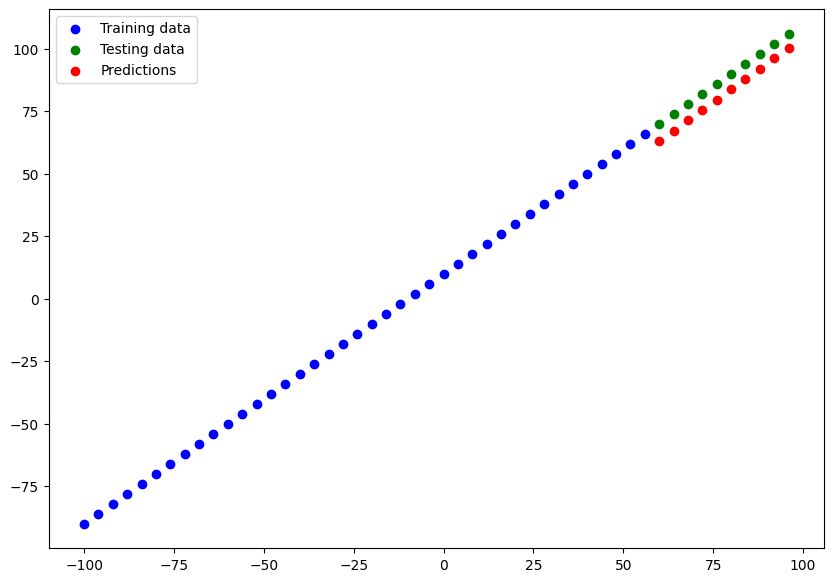

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.300483226776123>,
 <tf.Tensor: shape=(), dtype=float32, numpy=39.81306838989258>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [ ]:
# St random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ['mae']
                )

#  3. Fit the model
model_2.fit(tf.reshape(X_train, (-1, 1)), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 41.9218 - mae: 41.9218 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.6043 - mae: 17.6043
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7473 - mae: 11.7473
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.5826 - mae: 11.5826
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.6144 - mae: 13.6144
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.5271 - mae: 6.5271
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.0486 - mae: 12.0486
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.1011 - mae: 14.1011
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.4337 - mae: 15.4337
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.1212 - mae: 5.1212
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.9865 - mae: 12.9865
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.6091 - mae: 9.6091
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


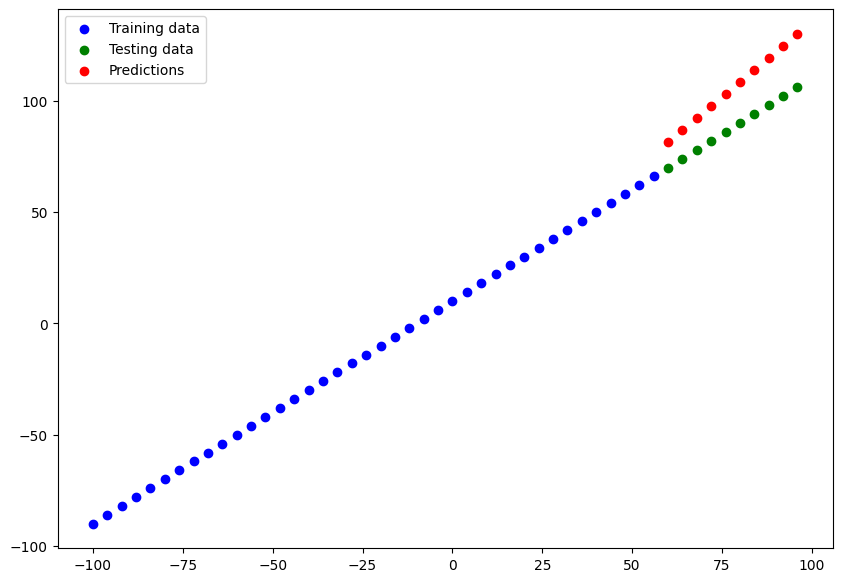

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Calculating model_3 evaluation metric
mae_2 = mae(y_test, y_pred)
mse_2 = mse(y_test, y_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7550895810127258>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6062943935394287>)

**Build_model_3**

* 2 layers, trained for 500 epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1, Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae']
)


# 3. Fit the model
model_3.fit(tf.reshape(X_train, (-1, 1)), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 35.5419 - mae: 35.5419
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 21.8213 - mae: 21.8213 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 9.2018 - mae: 9.2018 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10.1123 - mae: 10.1123
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 12.5739 - mae: 12.5739 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14.3631 - mae: 14.3631
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.1485 - mae: 11.1485
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.3211 - mae: 7.3211 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.8655 - mae: 11.8655
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 13.9724 - mae: 13.9724
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.4530 - mae: 16.4530
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.3393 - mae: 5.3393 
Epoch 13/500
2/2 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


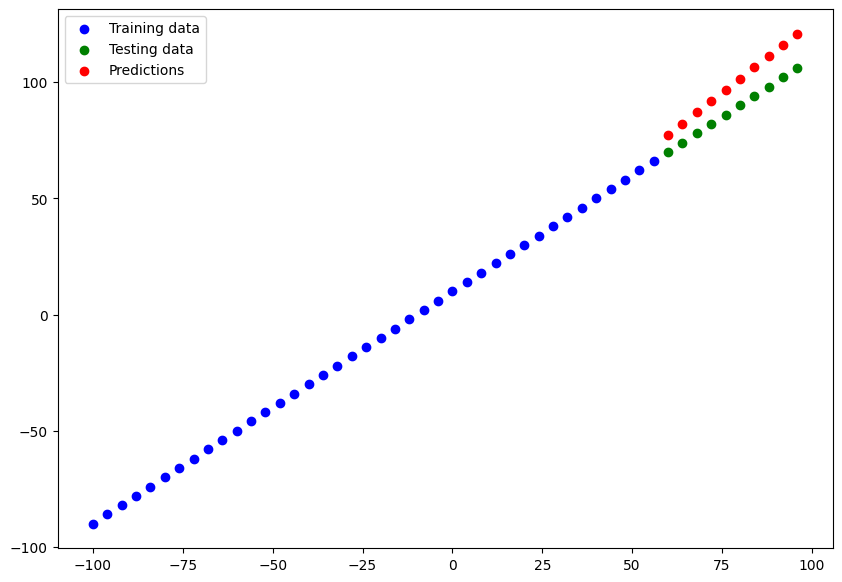

In [ ]:
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)



In [ ]:
mae_3 = mae(y_test, y_pred)
mse_3 = mse(y_test, y_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7550895810127258>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6062943935394287>)

**Note:**  You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments
We've run a few experiments, let's compare the results.


In [ ]:
# Let's compare our model's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]
                 ]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.300483,39.813068
1,model_2,0.755090,0.606294
2,model_3,0.755090,0.606294


In [ ]:
model_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Looks like model_2 and model_3 are same output

> **Note:** One of your main goals should be to minimize the time between your experimants. The more experiments you do, the more thins you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto. "experiment, experiment, experiment".

## Traching your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can b eedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resource:** As you build more model, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensors).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app).

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model with
model_2.save("best_model_SavedModel_format.keras")

In [ ]:
model_2.save("best_model_SavedModel_format.h5")

## Loading in a saved model



In [ ]:
# Load in the Saved model format model (keras model)
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format.keras")
loaded_SavedModel_format.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_SavedModel_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# check to see if loaded .h5 model's predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (seee the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there.

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_SavedModel_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (required mounting Google Drive)
!cp /content/best_model_SavedModel_format.h5 /content/drive/MyDrive/Colab_Notebooks/TensoFlow_Codes/

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/TensoFlow_Codes

best_model_SavedModel_format.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Create X & y valus (features and labels)
X = insurance_one_hot.drop(["charges"], axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10079.3154 - mae: 10079.3154   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7629.6162 - mae: 7629.6162 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7498.3975 - mae: 7498.3975
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7855.6172 - mae: 7855.6172 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7693.6777 - mae: 7693.6777
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7676.7676 - mae: 7676.7676 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7361.9565 - mae: 7361.9565
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7641.7163 - mae: 7641.7163 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7478.3994 - mae: 7478.3994
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7554.1221 - mae: 7554.1221 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7380.2344 - mae: 7380.2344
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8028.4004 - mae: 8028.4004  


[7995.7705078125, 7995.7705078125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. train for longer
3. (insert your own experiment layer)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13226.5469 - mae: 13226.5469
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12680.0850 - mae: 12680.0850
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10966.6768 - mae: 10966.6768
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8175.7539 - mae: 8175.7539
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7357.3853 - mae: 7357.3853
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7312.2612 - mae: 7312.2612
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7266.9824 - mae: 7266.9824
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7223.2144 - mae: 7223.2144
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7178.0425 - mae: 7178.0425
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7130.2065 - mae: 7130.2065
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7081.8237 - mae: 7081.8237
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3525.7817 - mae: 3525.7817  


[3458.036865234375, 3458.036865234375]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2, Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13234.8047 - mae: 13234.8047
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12698.0010 - mae: 12698.0010
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11002.0088 - mae: 11002.0088
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8197.4473 - mae: 8197.4473
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7359.5000 - mae: 7359.5000
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7315.1055 - mae: 7315.1055
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7270.4800 - mae: 7270.4800
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7227.7886 - mae: 7227.7886
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7183.1548 - mae: 7183.1548
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7137.4683 - mae: 7137.4683
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7089.6836 - mae: 7089.6836
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3210.7749 - mae: 3210.7749  


[3160.825439453125, 3160.825439453125]

Text(0.5, 0, 'epochs')

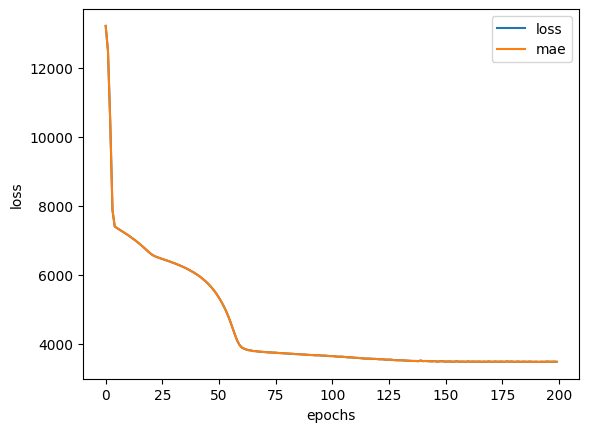

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


> 🤔**Question:** How long should you train for?

It depend. Really... it depends on the problem you're working on. However, may people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural netwoks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a  column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X =insurance.drop("charges", axis = 1)
y =insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. New let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13297.1016 - mae: 13297.1016
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13289.6504 - mae: 13289.6504
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13270.6934 - mae: 13270.6934
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13229.5127 - mae: 13229.5127
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13155.0020 - mae: 13155.0020
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13036.2969 - mae: 13036.2969
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12863.0068 - mae: 12863.0068
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12625.1416 - mae: 12625.1416
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12312.9746 - mae: 12312.9746
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11920.1123 - mae: 11920.1123
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11453.9971 - mae: 11453.9971
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3514.3477 - mae: 3514.3477  


[3428.7978515625, 3428.7978515625]

In [ ]:
# Insurance model 2 results
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3525.7817 - mae: 3525.7817

<Axes: ylabel='Frequency'>

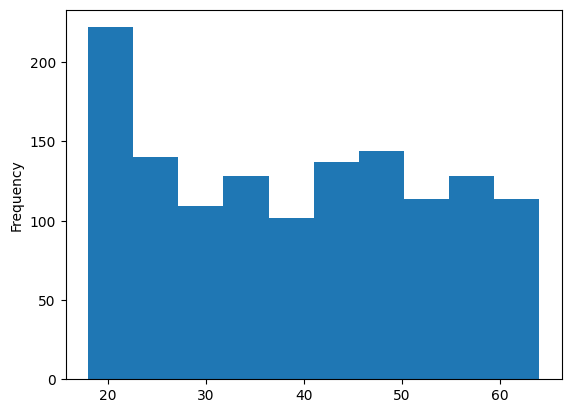

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

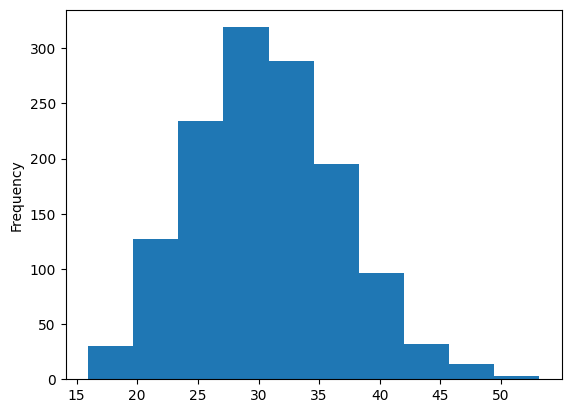

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18
